Ok every time I make one of these the format sucks so this time I'll try (extra hard) to make it as streamlined as possible!

here is the peak calibration link: https://www.fmf.uni-lj.si/~jazbinsek/Praktikum5/gammaenergies.pdf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
#from detector 1:
d1_U = np.genfromtxt('uranium_test_2019-02-19_D3S.csv', delimiter= ",").T
d1_Th = np.genfromtxt('thorium_test_2019-02-19_D3S.csv', delimiter= ",").T
#from detector 2:
d2_U = np.genfromtxt('Uranium_102566_2019-03-28_D3S.csv', delimiter= ",").T
d2_Th = np.genfromtxt('Thorium_102566_2019-03-28_D3S.csv', delimiter= ",").T

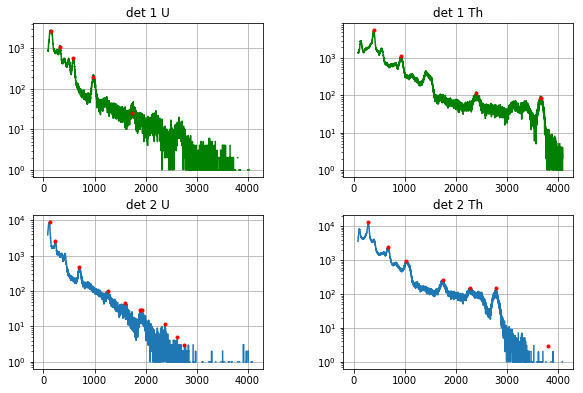

In [4]:
plt.subplot(221)
sd1U = np.sum(d1_U, axis=1)
plt.plot(sd1U, 'g')
manual_u = [1741, 980, 583, 324, 139]
plt.plot(manual_u, sd1U[manual_u], 'r.')
plt.yscale('log')
plt.title('det 1 U')
plt.grid(True)

plt.subplot(222)
sd1Th = np.sum(d1_Th, axis=1)
plt.plot(sd1Th[:-1], 'g')
manual_th = [390, 925, 2406, 3666]
plt.plot(manual_th, sd1Th[manual_th], 'r.')
plt.yscale('log')
plt.title('det 1 Th')
plt.grid(True)

plt.subplot(223)
sd2U = np.sum(d2_U, axis=1)
plt.plot(sd2U)
pfc_u = [118, 232, 704, 1260, 1604, 1888, 1913, 1935, 2380, 2624, 2762] # from peakfinder.py just for fun
plt.plot(pfc_u, sd2U[pfc_u], 'r.')
plt.yscale('log')
plt.title('det 2 U')
plt.grid(True)

plt.subplot(224)
sd2Th = np.sum(d2_Th, axis=1)
plt.plot(sd2Th)
pfc_th = [282, 672, 1019, 1745, 2280, 2786, 3817]
plt.plot(pfc_th, sd2Th[pfc_th], 'r.')
plt.yscale('log')
plt.title('det 2 Th')
plt.grid(True)

plt.subplots_adjust(top=1, bottom=-0.2, left=0, right=1.25, hspace=0.25, wspace=0.35)
plt.show()

In [5]:
def fitFunc(x, a, m, s, c):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c
def linBgFitFunc(x, a, m, s, c, b):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c + b * x
def find(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    trydata = fitFunc(xSlice, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50)
    p0 = [trymax,trymu,trysig,trybg]
    xpopt, xpcov = curve_fit(fitFunc, xxdata, xSlice, p0)
    print("parameters:", xpopt)
    print("uncertainties:", np.sqrt(np.diag(xpcov)))
    xchannel = xshift + int(xpopt[1])
    return xchannel
    #plt.show()
def linBgFind(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5, trylin=-20):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    p0 = [trymax,trymu,trysig,trybg, trylin]
    xpopt, xpcov = curve_fit(linBgFitFunc, xxdata, xSlice, p0)
    print(xpopt)
    xchannel = xshift + int(xpopt[1])
    return xchannel
def showFindFit(xSlice, xshift, trymax=20, trymu=200, trysig=100, trybg=5, lin=1):
    xmu = np.mean(xSlice)
    xsig = np.std(xSlice)
    xxdata = range(len(xSlice))
    #trydata = linBgFitFunc(1, np.max(xSlice), xmu, xsig, np.max(xSlice) + 50, lin)
    p0 = [trymax,trymu,trysig,trybg, lin]
    xpopt, xpcov = curve_fit(linBgFitFunc, xxdata, xSlice, p0)
    print(xpopt)
    xchannel = xshift + int(xpopt[1])
    return linBgFitFunc(xxdata, *xpopt)

This part is for finding one of the uranium peaks that the peakFinder didnt highlight.

parameters: [ 412.14947471   43.78304231  -22.8951626   129.1928381 ]
uncertainties: [ 11.21760404   0.29320627   0.78318493  12.0750839 ]
583


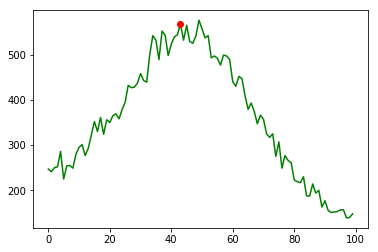

In [6]:
Bi5_shift = 540
Bi5_range = 100
Bi5_slice = sd1U[Bi5_shift:Bi5_shift+Bi5_range]
plt.plot(Bi5_slice , 'g')
Bi5_find = find(Bi5_slice, Bi5_shift)
print(Bi5_find)
plt.plot(Bi5_find-Bi5_shift, Bi5_slice[Bi5_find-Bi5_shift], 'ro')

plt.show()

parameters: [ 786.42505559   19.18766335   20.79960615  317.30306821]
uncertainties: [ 8.48016602  0.29823023  0.39492718  6.4175544 ]
419


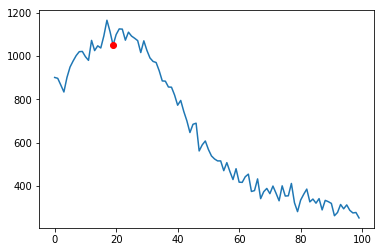

In [7]:
Bi5_shift = 400
Bi5_range = 100
Bi5_slice = sd2U[Bi5_shift:Bi5_shift+Bi5_range]
plt.plot(Bi5_slice)
Bi5_find = find(Bi5_slice, Bi5_shift)
print(Bi5_find)
plt.plot(Bi5_find-Bi5_shift, Bi5_slice[Bi5_find-Bi5_shift], 'ro')

plt.show()
# 419 is the channel in d2 that cooresponds to ch583 in d1

In [8]:
manual_u #=[1741, 980, 583, 324, 139]
pfc_u = [1260, 704, 419, 232, 118] #=[118, 232, 704, 1260, 1604, 1888, 1913, 1935, 2380, 2624, 2762]
en_u = [1120.3, 609.3, 352, 185.7, 92.6]

manual_th = [390, 925, 3666]#= [390, 925, 2406, 3666]
pfc_th = [282, 672, 2786]#=[282, 672, 1019, 1745, 2280, 2786, 3817]
en_th = [238.6, 583.1, 2614.7]

d1 = manual_u + manual_th
d2 = pfc_u + pfc_th
en = en_u + en_th

In [9]:
def polyfit(x, b, m, r):
    return r * x*x + m*x + b

parameters: [  4.97812684e+00   5.80899642e-01   3.56962797e-05]
uncertainties: [  6.22217261e+00   1.03910835e-02   2.61928217e-06]
values: [b,m,r]


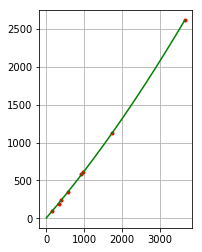

parameters: [ -1.10849331e+01   8.61410317e-01   2.91042468e-05]
uncertainties: [  2.71111063e+00   6.12690969e-03   2.02725944e-06]
values: [b,m,r]


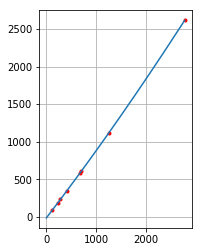

In [10]:
plt.subplot(121)
plt.plot(d1, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, d1, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")

plt.grid(True)
plt.plot(polyfit(range(max(d1)), *xpopt), 'g')
plt.show()

plt.subplot(122)
plt.plot(d2, en, 'r.')
p0 = [.6, 1, 2]
xpopt, xpcov = curve_fit(polyfit, d2, en, p0)
print("parameters:", xpopt)
print("uncertainties:", np.sqrt(np.diag(xpcov)))
print("values: [b,m,r]")
plt.plot(polyfit(range(max(d2)), *xpopt))
plt.grid(True)
plt.show()

Only the linear term has an uncertainty of order E0 in both calibrations. I think that means the fits are pretty good.

Aww man I really don't want to find the uncertainties of each hand-fit peak but I will do it anyways because otherwise I'd be playing League or watching anime or something.

### 1120.3keV Bi-214(15.1):

parameters: [ 17.9729226   91.43865583  46.92755944  14.47650816]
uncertainties: [ 2.11169663  2.24844028  6.72143854  2.29821955]
values: [trymax,trymu,trysig,trybg]
1741


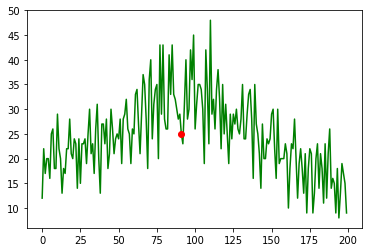

In [11]:
Bi214_shift = 1650
Bi214_range = 200
Bi214_slice = sd1U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 43.00572007  41.58600001  74.56592603  32.51162532]
uncertainties: [ 1.0209211   4.06982956  4.06048982  0.62209683]
values: [trymax,trymu,trysig,trybg]
1241


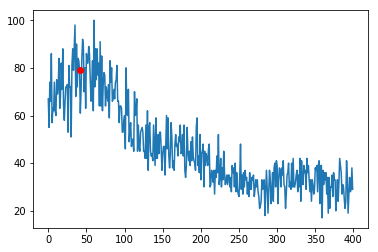

In [12]:
Bi214_shift = 1200
Bi214_range = 400
Bi214_slice = sd2U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


This doesn't return channel 1260 because this is the hand-pick method and 1260 came from the tryPeakfinder.py script. Evidently it got 1260 from picking the highest peak.

### 609.3keV Bi-214(46.3):

parameters: [ 151.73454794   80.15552973   29.55333653   44.84798396]
uncertainties: [ 2.28767662  0.43648807  0.61336419  1.63997815]
values: [trymax,trymu,trysig,trybg]
980


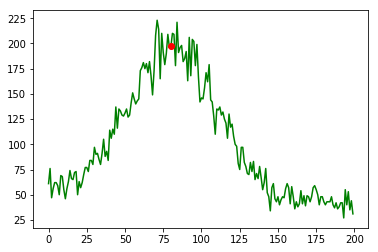

In [13]:
Bi214_shift = 900
Bi214_range = 200
Bi214_slice = sd1U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 278.57286024  104.86661854   28.25812845  145.43712675]
uncertainties: [ 4.72414067  0.53568263  0.58660888  1.67117373]
values: [trymax,trymu,trysig,trybg]
704


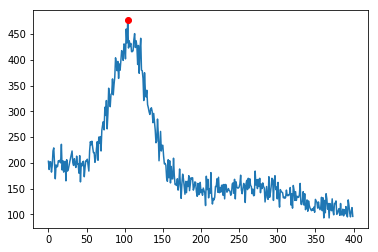

In [14]:
Bi214_shift = 600
Bi214_range = 400
Bi214_slice = sd2U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


### 352.0keV Pb-214(37.2):

parameters: [ 407.89139847   60.92508134   30.27224558   95.96587309]
uncertainties: [ 8.24847075  0.64738848  0.77359949  4.25455343]
values: [trymax,trymu,trysig,trybg]
580


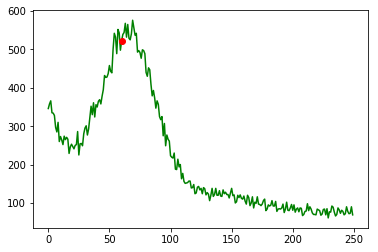

In [15]:
Bi214_shift = 520
Bi214_range = 250
Bi214_slice = sd1U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 765.36810505   36.679195     24.02469457  312.12182892]
uncertainties: [ 23.5025346    0.42692518   0.94442977  24.39620144]
values: [trymax,trymu,trysig,trybg]
416


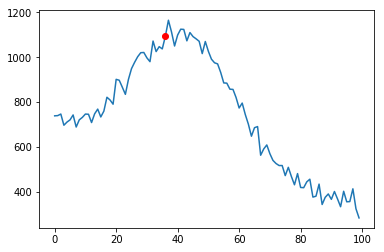

In [16]:
Bi214_shift = 380
Bi214_range = 100
Bi214_slice = sd2U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


### 185.7keV U-235(54):

parameters: [ 679.02533185   30.04510951   19.41591507  424.81993613]
uncertainties: [ 17.11777582   0.38037738   0.66746634  16.00121288]
values: [trymax,trymu,trysig,trybg]
320


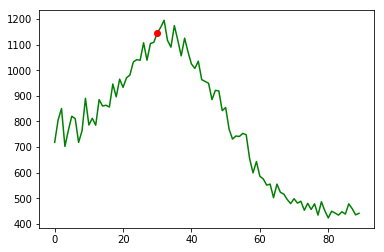

In [17]:
Bi214_shift = 290
Bi214_range = 90
Bi214_slice = sd1U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 1433.287603      30.18882777    16.41695811  1069.34699333]
uncertainties: [ 43.33631507   0.36383402   0.66986755  41.50429185]
values: [trymax,trymu,trysig,trybg]
230


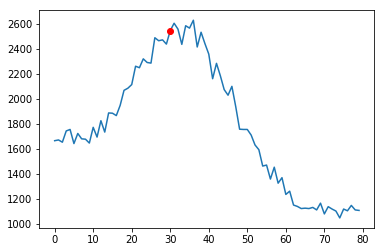

In [18]:
Bi214_shift = 200
Bi214_range = 80
Bi214_slice = sd2U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


### 92.6keV U-238(5.4):

parameters: [ 6242.71652535    43.99327689    58.81683655 -3511.66935572]
uncertainties: [  3.62347535e+03   2.95963382e-01   1.93681435e+01   3.63623342e+03]
values: [trymax,trymu,trysig,trybg]
143


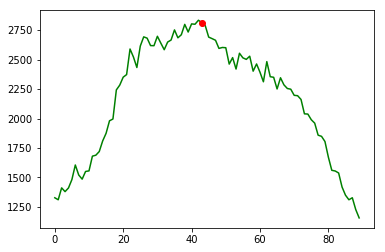

In [19]:
Bi214_shift = 100
Bi214_range = 90
Bi214_slice = sd1U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 7274.89601745    12.62156314    14.54316998  1711.53865123]
uncertainties: [ 70.21373233   0.20922141   0.25455979  45.17320347]
values: [trymax,trymu,trysig,trybg]
112


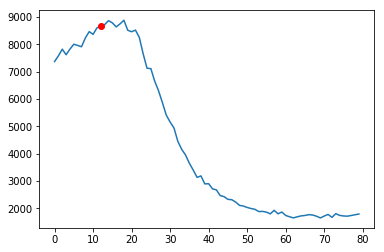

In [20]:
Bi214_shift = 100
Bi214_range = 80
Bi214_slice = sd2U[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


## Now to Thorium peaks:

### 238.6keV Pb-212(45):

parameters: [ 3768.94710562    40.59609287    17.74495256  1842.32649632]
uncertainties: [ 67.13538903   0.21208296   0.44573205  68.59035095]
values: [trymax,trymu,trysig,trybg]
390


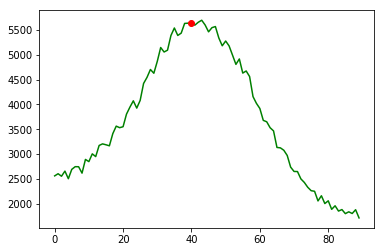

In [21]:
Bi214_shift = 350
Bi214_range = 90
Bi214_slice = sd1Th[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 8516.82114171    33.99363419    16.47431903  3993.71934333]
uncertainties: [ 97.0419593    0.17659451   0.24996779  72.08250132]
values: [trymax,trymu,trysig,trybg]
283


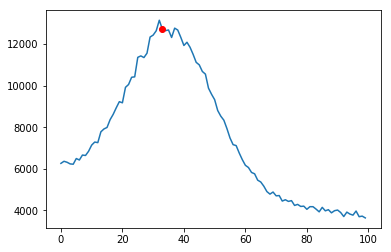

In [22]:
Bi214_shift = 250
Bi214_range = 100
Bi214_slice = sd2Th[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


### 583.1keV Ti-208(84.2):

parameters: [ 738.37837254   27.55217929   30.5126549   346.30715066]
uncertainties: [ 28.97837022   0.42386439   1.32451901  31.26778824]
values: [trymax,trymu,trysig,trybg]
927


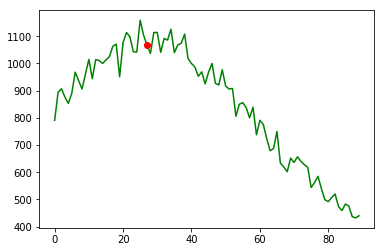

In [23]:
Bi214_shift = 900
Bi214_range = 90
Bi214_slice = sd1Th[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 1580.7479827     21.90787058    26.80117383   771.0843969 ]
uncertainties: [ 15.55247734   0.29092292   0.46370652  15.54586495]
values: [trymax,trymu,trysig,trybg]
671


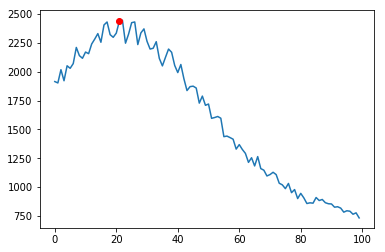

In [24]:
Bi214_shift = 650
Bi214_range = 100
Bi214_slice = sd2Th[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


### 2614.7keV Th-232(100):

parameters: [  62.07009452  168.60191682   38.61609067   18.5423618 ]
uncertainties: [ 1.26774006  1.30026609  1.53343235  0.85410088]
values: [trymax,trymu,trysig,trybg]
3668


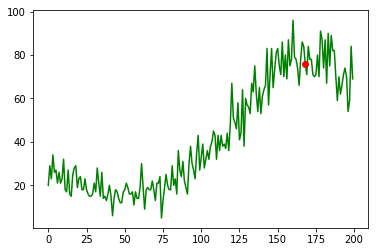

In [25]:
Bi214_shift = 3500
Bi214_range = 200
Bi214_slice = sd1Th[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice , 'g')
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()

parameters: [ 99.78378616  79.28072097  51.46275709  12.7336429 ]
uncertainties: [ 3.48647049  0.75876935  2.10369388  3.7374323 ]
values: [trymax,trymu,trysig,trybg]
2779


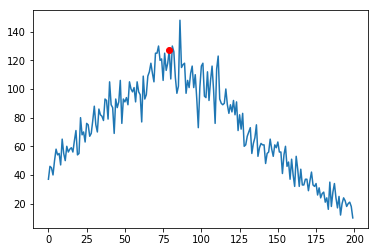

In [26]:
Bi214_shift = 2700
Bi214_range = 200
Bi214_slice = sd2Th[Bi214_shift:Bi214_shift+Bi214_range]
plt.plot(Bi214_slice)
Bi214_find = find(Bi214_slice, Bi214_shift)
print("values: [trymax,trymu,trysig,trybg]")
print(Bi214_find)
plt.plot(Bi214_find-Bi214_shift, Bi214_slice[Bi214_find-Bi214_shift], 'ro')

plt.show()


Now that we have more data we gotta make more graphs. It is imperative.

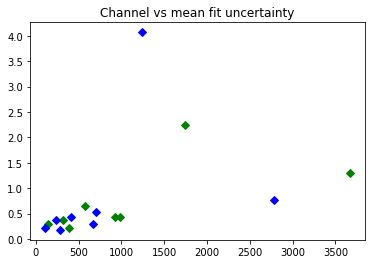

In [35]:
handChannelsD1 = [143, 320, 390, 580, 927, 980, 1741, 3668]
meanSigmaD1 = [0.295, 0.380, 0.212, 0.647, 0.424, 0.436, 2.248, 1.300]

handChannelsD2 = [112, 230, 283, 416, 671, 704, 1241, 2779]
meanSigmaD2 = [0.209, 0.364, 0.177, 0.427, 0.291, 0.536, 4.070, 0.759]

plt.plot(handChannelsD1, meanSigmaD1, 'gD')

plt.plot(handChannelsD2, meanSigmaD2, 'bD')
plt.title("Channel# vs mean fit uncertainty")

plt.show()

I spent 30min trying to get plt.bar to work but I kept hitting some datatype error.